In [2]:
%run IDM_helper_functions.ipynb

In [3]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [4]:
import pandas as pd
import os

In [57]:
data_dir = '/Users/wangjiashun/Desktop/SAT/validation_text_data/exp_3/pp'        
sample_size = 20

In [6]:
par_fitted_A = np.zeros((20,4))

In [7]:
for i in range(20):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    df = df[df["cond"]=="A"] # A condition
    
    data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
    samp = Sample.from_numpy_array(data_sub, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


0


Info: Params [2.5545841  8.04450724 5.19071713 0.1797678 ] gave -276.04589565006637


[2.5545841  5.19071713 0.1797678  8.04450724]
1


Info: Params [2.31573681 6.67268913 4.94210673 0.10036226] gave -217.6423864620553


[2.31573681 4.94210673 0.10036226 6.67268913]
2


Info: Params [3.43191094 7.79570032 3.50516145 0.15403477] gave -380.55288175453796


[3.43191094 3.50516145 0.15403477 7.79570032]
3


Info: Params [0.81662765 7.3511208  1.5953716  0.17959823] gave -27.919933530780863


[0.81662765 1.5953716  0.17959823 7.3511208 ]
4


Info: Params [2.2419554  6.45248436 0.99093129 0.20982615] gave -243.6712890090899


[2.2419554  0.99093129 0.20982615 6.45248436]
5


Info: Params [1.36933282 6.92240175 2.00566233 0.15979808] gave -86.72706017736934


[1.36933282 2.00566233 0.15979808 6.92240175]
6


Info: Params [1.64545259 5.97060737 1.17419171 0.21366453] gave -116.9364092165042


[1.64545259 1.17419171 0.21366453 5.97060737]
7


Info: Params [1.66104931 2.65271881 0.92355061 0.19223377] gave -10.229494512454185


[1.66104931 0.92355061 0.19223377 2.65271881]
8


Info: Params [1.56917263 5.94544341 1.3229385  0.18557557] gave -118.741128549827


[1.56917263 1.3229385  0.18557557 5.94544341]
9


Info: Params [0.63655966 4.79869419 0.51178155 0.20383785] gave -81.49014185496092


[0.63655966 0.51178155 0.20383785 4.79869419]
10


Info: Params [1.28775191 6.15755622 1.27252297 0.18007156] gave -50.04616346747804


[1.28775191 1.27252297 0.18007156 6.15755622]
11


Info: Params [0.51865805 7.75010455 3.0507574  0.10040814] gave -15.851861836474487


[0.51865805 3.0507574  0.10040814 7.75010455]
12


Info: Params [1.17695945 5.1215995  1.2211623  0.16147885] gave 6.678224364387855


[1.17695945 1.2211623  0.16147885 5.1215995 ]
13


Info: Params [1.86423971 6.63161225 1.80437519 0.26615692] gave -160.53856724427771


[1.86423971 1.80437519 0.26615692 6.63161225]
14


Info: Params [1.58738201 4.15173038 1.50440052 0.15443142] gave -32.920847783646636


[1.58738201 1.50440052 0.15443142 4.15173038]
15


Info: Params [2.33476365 4.35730728 1.00527178 0.27254573] gave -186.5442610473067


[2.33476365 1.00527178 0.27254573 4.35730728]
16


Info: Params [3.06109164 4.64369442 0.69377115 0.28690017] gave -361.4331029089796


[3.06109164 0.69377115 0.28690017 4.64369442]
17


Info: Params [0.82820404 8.17099807 1.47050726 0.31331225] gave 27.485553307499988


[0.82820404 1.47050726 0.31331225 8.17099807]
18


Info: Params [2.68406051 3.79202701 0.8765459  0.23696085] gave -265.3147630601862


[2.68406051 0.8765459  0.23696085 3.79202701]
19


Info: Params [1.80571345 4.46653747 1.23392127 0.212527  ] gave -90.28668370799268


[1.80571345 1.23392127 0.212527   4.46653747]


In [8]:
par_fitted_B = np.zeros((20,4))

In [9]:
for i in range(20):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    df = df[df["cond"]=="B"] # B condition
    
    data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
    samp = Sample.from_numpy_array(data_sub, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_B[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_B[i,:])


0


Info: Params [1.64452506 3.16814828 1.18018812 0.30001558] gave 70.16414304040691


[1.64452506 1.18018812 0.30001558 3.16814828]
1


Info: Params [1.1925654  3.06885243 1.22060242 0.34442601] gave 167.21354168931038


[1.1925654  1.22060242 0.34442601 3.06885243]
2


Info: Params [1.58211708 3.27100307 1.4081601  0.21322843] gave 111.37666674780525


[1.58211708 1.4081601  0.21322843 3.27100307]
3


Info: Params [0.60583274 3.08210165 0.94696958 0.28515545] gave 228.68646118214645


[0.60583274 0.94696958 0.28515545 3.08210165]
4


Info: Params [2.17319356 2.25468488 1.29208358 0.25917267] gave -64.66094069888197


[2.17319356 1.29208358 0.25917267 2.25468488]
5


Info: Params [0.95538758 3.40614805 0.95106194 0.30958422] gave 110.0114317869587


[0.95538758 0.95106194 0.30958422 3.40614805]
6


Info: Params [1.54832069 4.2770427  1.2397271  0.22020405] gave 16.553923895416286


[1.54832069 1.2397271  0.22020405 4.2770427 ]
7


Info: Params [1.37883446 1.98374411 2.14204244 0.15550991] gave 227.19423547454718


[1.37883446 2.14204244 0.15550991 1.98374411]
8


Info: Params [1.42026991 2.66512541 1.70535885 0.20830781] gave 185.20683992693915


[1.42026991 1.70535885 0.20830781 2.66512541]
9


Info: Params [1.16776815 1.83374392 1.68423044 0.11251007] gave 310.465813820802


[1.16776815 1.68423044 0.11251007 1.83374392]
10


Info: Params [1.06629696 4.073452   1.13725134 0.2000049 ] gave 109.46009393772732


[1.06629696 1.13725134 0.2000049  4.073452  ]
11


Info: Params [1.19753974 1.8065306  1.61153171 0.3631752 ] gave 302.64953441641836


[1.19753974 1.61153171 0.3631752  1.8065306 ]
12


Info: Params [1.25275234 3.20719039 1.02162117 0.28981027] gave 120.87157264212546


[1.25275234 1.02162117 0.28981027 3.20719039]
13


Info: Params [1.36827274 2.31789663 1.13446894 0.48304779] gave 153.85233935223775


[1.36827274 1.13446894 0.48304779 2.31789663]
14


Info: Params [1.5448168  5.26785183 2.29157948 0.19335122] gave -16.860028868190913


[1.5448168  2.29157948 0.19335122 5.26785183]
15


Info: Params [2.05096335 5.23062307 2.00951151 0.26657455] gave -91.96382719465045


[2.05096335 2.00951151 0.26657455 5.23062307]
16


Info: Params [ 1.75658362 -0.57846392  0.61743014  0.35116506] gave -2.6640120666121057


[ 1.75658362  0.61743014  0.35116506 -0.57846392]
17


Info: Params [0.5791985  2.06641089 1.46199238 0.32699022] gave 424.2178266617752


[0.5791985  1.46199238 0.32699022 2.06641089]
18


Info: Params [1.64770181 4.06509121 1.69422442 0.29336905] gave 19.847295712290315


[1.64770181 1.69422442 0.29336905 4.06509121]
19


Info: Params [ 1.29776637 -2.89462395  0.65202436  0.35261927] gave 241.95081532765874


[ 1.29776637  0.65202436  0.35261927 -2.89462395]


In [66]:
df_SAT

,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition,SAT
0,2.554584,5.190717,0.179768,8.044507,Speed
1,2.315737,4.942107,0.100362,6.672689,Speed
2,3.431911,3.505161,0.154035,7.795700,Speed
3,0.816628,1.595372,0.179598,7.351121,Speed
4,2.241955,0.990931,0.209826,6.452484,Speed
5,1.369333,2.005662,0.159798,6.922402,Speed
6,1.645453,1.174192,0.213665,5.970607,Speed
7,1.661049,0.923551,0.192234,2.652719,Speed
8,1.569173,1.322938,0.185576,5.945443,Speed
9,0.636560,0.511782,0.203838,4.798694,Speed


In [58]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time', "Effective Inhibition"])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size

df_SAT.to_csv("OUMresultDutilh2019.csv")

In [61]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

In [62]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

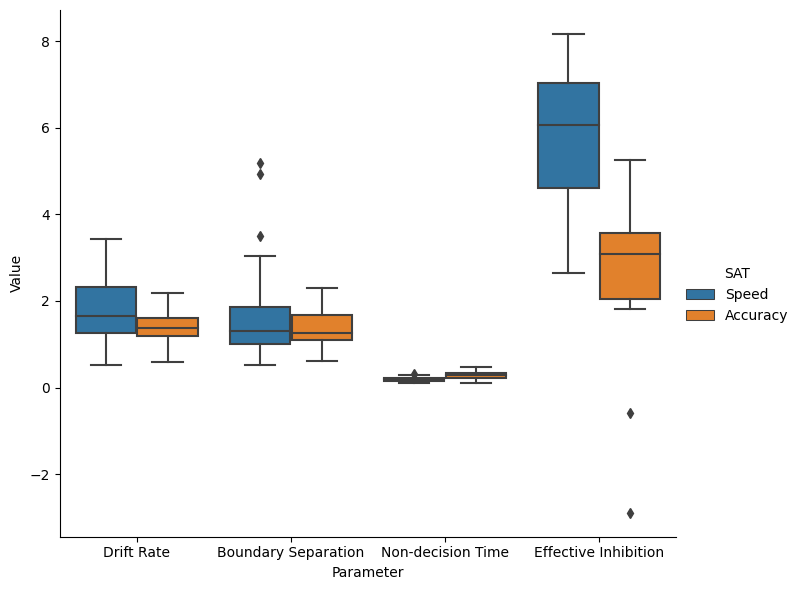

In [63]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6)

In [68]:
df_dif_melted.to_csv("OUMdifResultDutilh2019.csv") 

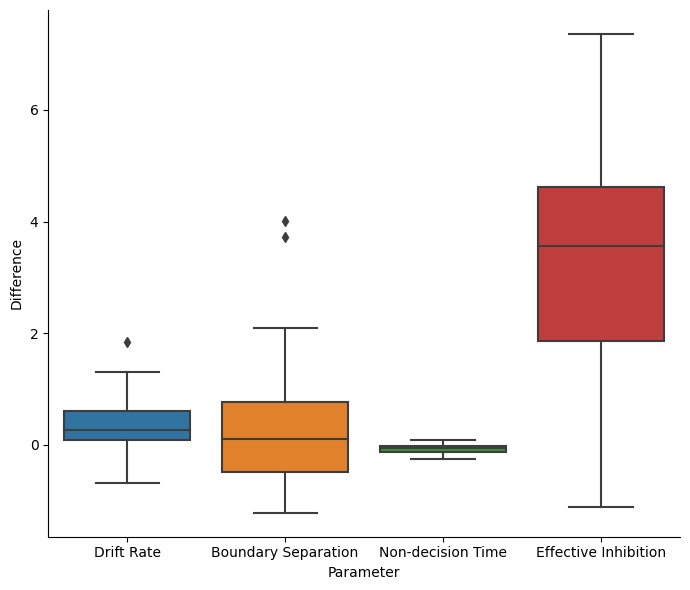

In [64]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [51]:
v1 = np.array(df_SAT.loc[(df_SAT['variable'] =="Drift Rate") & (df_SAT['SAT'] == 1)]["value"])
v2 = np.array(df_SAT.loc[(df_SAT['variable'] =="Drift Rate") & (df_SAT['SAT'] == 2)]["value"])
dif_v = v1 - v2
np.mean(dif_v)/np.std(dif_v)

0.534296565058134

In [43]:
dif_v = df_SAT[df_SAT["variable"]=="Drift Rate"]["value"] - df_SAT[df_SAT["variable"]=="Drift Rate"]["value"]

,participant,SAT,variable,value
0,1.0,1,Drift Rate,4.641442
1,2.0,1,Drift Rate,4.812552
2,3.0,1,Drift Rate,4.226116
3,4.0,1,Drift Rate,1.814764
4,5.0,1,Drift Rate,2.616027
5,6.0,1,Drift Rate,2.892733
6,7.0,1,Drift Rate,4.406183
7,8.0,1,Drift Rate,2.884605
8,9.0,1,Drift Rate,2.818524
9,10.0,1,Drift Rate,1.138077


In [16]:
import seaborn as sns


In [53]:
sns.catplot(data=df_SAT, x="parameter", y="values", hue="condition", kind="box",
            height=6, aspect=8/6)

ValueError: Could not interpret input 'parameter'

In [18]:
import scipy

In [19]:
scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0])

Ttest_relResult(statistic=2.954476655896003, pvalue=0.008141075695752857)

In [20]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=1.3666829806693381, pvalue=0.18768050875769932)

## DDM-OUM: use Dutilh 2018 DDM parameters - let inhibition and boundary vary

In [22]:
df_Dutilh2018 = pd.read_csv('DDMresultDutilh.csv')
df_Dutilh2018

,Unnamed: 0,Drift Rate,Boundary Separation,Non-decision Time,SAT
0,0,4.886592,1.173918,0.343236,1
1,1,5.255924,1.083176,0.340134,1
2,2,4.993867,1.047623,0.257719,1
3,3,1.769413,0.899000,0.264103,1
4,4,2.576097,0.602602,0.227779,1
5,5,2.445525,0.910601,0.251856,1
6,6,3.639097,1.175035,0.244861,1
7,7,3.017418,1.208609,0.202474,1
8,8,2.906562,0.939030,0.225931,1
9,9,1.132213,0.718812,0.209710,1


In [30]:
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Participant', 'v','a','ter','k','SAT'],)

for Participant in range(40):

    print(Participant)

    model = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=df_Dutilh2018["Drift Rate"][Participant]),   
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B = df_Dutilh2018["Boundary Separation"][Participant]),
                  overlay=OverlayNonDecision(nondectime = df_Dutilh2018["Non-decision Time"][Participant]),
                  dx=.001, dt=.001, T_dur=3)

    sol = model.solve()
    samp = sol.resample(1000)


    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-10, maxval=15)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

    df_sub = pd.DataFrame({
                           'SAT':df_Dutilh2018["SAT"][Participant], 
                           'participant': Participant + 1,
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                           'Effective Inhibition': np.array(model_fit.parameters()['drift']['x'])
                          }, index=[i])

    df_all = df_all.append(df_sub)

    print(df_sub)


0


Info: Params [4.64144202 0.27949574 1.10421328 0.35710912] gave -1938.9813279025893


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            1    4.641442             1.104213           0.357109   

   Effective Inhibition  
2              0.279496  
1


Info: Params [4.8125522  4.36289306 4.46552285 0.15832253] gave -2307.8627146930808


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            2    4.812552             4.465523           0.158323   

   Effective Inhibition  
2              4.362893  
2


Info: Params [4.22611554 3.56699522 1.36413885 0.23979738] gave -2088.048271049306


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            3    4.226116             1.364139           0.239797   

   Effective Inhibition  
2              3.566995  
3


Info: Params [ 1.81476423 -2.68288025  0.6939418   0.29282955] gave 506.08757798483526


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            4    1.814764             0.693942            0.29283   

   Effective Inhibition  
2              -2.68288  
4


Info: Params [ 2.61602706 -0.94794394  0.57561981  0.23156235] gave -1094.16335219224


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            5    2.616027              0.57562           0.231562   

   Effective Inhibition  
2             -0.947944  
5


Info: Params [ 2.89273287 -3.04363152  0.76186623  0.27096958] gave -444.5870611207619


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            6    2.892733             0.761866            0.27097   

   Effective Inhibition  
2             -3.043632  
6


Info: Params [ 4.40618295 -2.04148437  1.07827869  0.25552757] gave -1175.9623474184618


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            7    4.406183             1.078279           0.255528   

   Effective Inhibition  
2             -2.041484  
7


Info: Params [2.88460471 0.25770818 1.14295313 0.21621349] gave -642.5732414606322


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            8    2.884605             1.142953           0.216213   

   Effective Inhibition  
2              0.257708  
8


Info: Params [2.81852404 0.29027889 0.91364091 0.233302  ] gave -840.8658145368277


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            9    2.818524             0.913641           0.233302   

   Effective Inhibition  
2              0.290279  
9


Info: Params [ 1.13807747 -0.87752492  0.67385838  0.21654848] gave 962.0882766193872


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           10    1.138077             0.673858           0.216548   

   Effective Inhibition  
2             -0.877525  
10


Info: Params [ 3.08551396 -1.63941983  0.95910697  0.23680589] gave -486.3926719410282


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           11    3.085514             0.959107           0.236806   

   Effective Inhibition  
2              -1.63942  
11


Info: Params [1.53344037 0.40416463 1.09840325 0.22119222] gave 940.1935852638111


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           12     1.53344             1.098403           0.221192   

   Effective Inhibition  
2              0.404165  
12


Info: Params [1.9655926  0.3731387  0.87904171 0.20528304] gave 20.770366114277806


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           13    1.965593             0.879042           0.205283   

   Effective Inhibition  
2              0.373139  
13


Info: Params [2.54436007 1.09137292 0.98838324 0.30825064] gave -772.4807271688085


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           14     2.54436             0.988383           0.308251   

   Effective Inhibition  
2              1.091373  
14


Info: Params [3.55634788 0.05760739 1.44425017 0.19294063] gave -844.1124098725942


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           15    3.556348              1.44425           0.192941   

   Effective Inhibition  
2              0.057607  
15


Info: Params [3.91140515 0.064528   1.00922564 0.30586078] gave -1517.78214923517


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           16    3.911405             1.009226           0.305861   

   Effective Inhibition  
2              0.064528  
16


Info: Params [ 3.27653076 -0.66237224  0.52119677  0.29420014] gave -1852.9136029579854


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           17    3.276531             0.521197             0.2942   

   Effective Inhibition  
2             -0.662372  
17


Info: Params [ 2.19211235 -0.69636499  0.90373542  0.39572062] gave 53.459087007976734


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           18    2.192112             0.903735           0.395721   

   Effective Inhibition  
2             -0.696365  
18


Info: Params [5.22559329 1.72951277 1.71243393 0.21292389] gave -2205.995302282408


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           19    5.225593             1.712434           0.212924   

   Effective Inhibition  
2              1.729513  
19


Info: Params [ 5.32696563 -3.36972117  1.20431404  0.24416914] gave -947.6187940395554


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           20    5.326966             1.204314           0.244169   

   Effective Inhibition  
2             -3.369721  
20


Info: Params [ 2.83512364 -1.21940787  1.04569372  0.36889407] gave -214.4337682257472


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           21    2.835124             1.045694           0.368894   

   Effective Inhibition  
2             -1.219408  
21


Info: Params [ 2.21257395 -1.11724634  1.04857933  0.44633449] gave 452.9949192438303


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           22    2.212574             1.048579           0.446334   

   Effective Inhibition  
2             -1.117246  
22


Info: Params [ 5.96745989 -4.72651435  1.38203665  0.289911  ] gave 71.0427814518789


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           23     5.96746             1.382037           0.289911   

   Effective Inhibition  
2             -4.726514  
23


Info: Params [1.27083224 0.30242089 1.29784348 0.31687683] gave 1591.150759153586


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           24    1.270832             1.297843           0.316877   

   Effective Inhibition  
2              0.302421  
24


Info: Params [3.75141001 0.64347099 1.58898205 0.29448506] gave -1098.6941450409959


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           25     3.75141             1.588982           0.294485   

   Effective Inhibition  
2              0.643471  
25


Info: Params [1.16042596 1.78135353 0.87565934 0.32475759] gave 845.1405555913782


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           26    1.160426             0.875659           0.324758   

   Effective Inhibition  
2              1.781354  
26


Info: Params [2.4212787  0.86233536 1.34915642 0.24121258] gave -228.88230602459095


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           27    2.421279             1.349156           0.241213   

   Effective Inhibition  
2              0.862335  
27


Info: Params [ 2.86560874 -0.34618612  2.05854769  0.23852319] gave 504.06733369716545


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           28    2.865609             2.058548           0.238523   

   Effective Inhibition  
2             -0.346186  
28


Info: Params [2.12959875 0.20328411 1.43871231 0.30460853] gave 456.0229940768943


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           29    2.129599             1.438712           0.304609   

   Effective Inhibition  
2              0.203284  
29


Info: Params [1.73802843 0.02215357 1.43046608 0.21067666] gave 1073.4230417396684


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           30    1.738028             1.430466           0.210677   

   Effective Inhibition  
2              0.022154  
30


Info: Params [1.97425069 0.18278411 1.26525487 0.24040623] gave 514.7298521837149


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           31    1.974251             1.265255           0.240406   

   Effective Inhibition  
2              0.182784  
31


Info: Params [1.80850732 0.1025909  1.4554723  0.48908035] gave 967.3420197617969


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           32    1.808507             1.455472            0.48908   

   Effective Inhibition  
2              0.102591  
32


Info: Params [ 1.86504603 -1.37344615  0.80359163  0.34252151] gave 450.82452215377384


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           33    1.865046             0.803592           0.342522   

   Effective Inhibition  
2             -1.373446  
33


Info: Params [ 3.29118766 -2.31277874  1.12614689  0.58687779] gave 27.52244653792395


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           34    3.291188             1.126147           0.586878   

   Effective Inhibition  
2             -2.312779  
34


Info: Params [ 3.43730295 -1.32496527  1.20369062  0.31209483] gave -433.0149911428832


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           35    3.437303             1.203691           0.312095   

   Effective Inhibition  
2             -1.324965  
35


Info: Params [ 2.36199217 -0.41921896  0.73395201  0.38760891] gave -525.2046250899159


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           36    2.361992             0.733952           0.387609   

   Effective Inhibition  
2             -0.419219  
36


Info: Params [3.46009238 0.28329579 1.36822675 0.33425007] gave -916.9565621353316


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           37    3.460092             1.368227            0.33425   

   Effective Inhibition  
2              0.283296  
37


Info: Params [1.33644793 0.24806959 1.82374515 0.4487866 ] gave 1647.2933142017682


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           38    1.336448             1.823745           0.448787   

   Effective Inhibition  
2               0.24807  
38


Info: Params [ 3.27288863 -0.63652256  1.30848165  0.38745113] gave -446.851646701654


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           39    3.272889             1.308482           0.387451   

   Effective Inhibition  
2             -0.636523  
39


Info: Params [2.11134108 0.20471604 1.48266072 0.32788111] gave 519.3495282954743


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           40    2.111341             1.482661           0.327881   

   Effective Inhibition  
2              0.204716  


In [ ]:
df_SAT = pd.melt(df_all, 
                 id_vars=['participant', 'SAT'], 
                 value_vars=['Drift Rate','Boundary Separation','Non-decision Time','Effective Inhibition'])

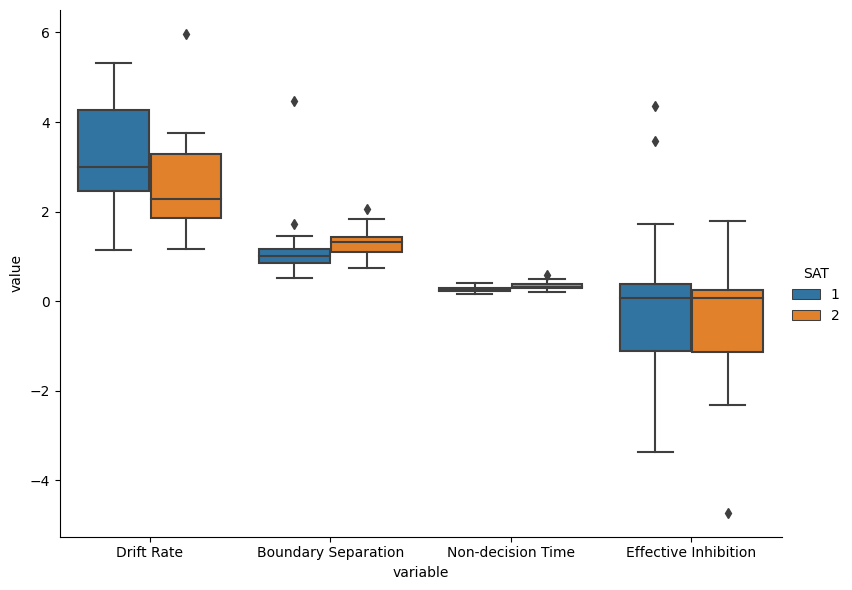

In [33]:
sns.catplot(data=df_SAT, x="variable", y="value", hue="SAT", kind="box",
            height=6, aspect=8/6)

In [36]:
import scipy
scipy.stats.ttest_rel(df_SAT[:20]['value'], df_SAT[20:40]['value'])

Ttest_relResult(statistic=2.328944732969312, pvalue=0.03105070524050918)

In [38]:
scipy.stats.ttest_rel(df_SAT[40:60]['value'], df_SAT[60:80]['value'])

Ttest_relResult(statistic=-0.6185541416934783, pvalue=0.5435552020330445)

In [39]:
scipy.stats.ttest_rel(df_SAT[80:100]['value'], df_SAT[100:120]['value'])

Ttest_relResult(statistic=-4.29945450775912, pvalue=0.00038685827758349055)

In [40]:
scipy.stats.ttest_rel(df_SAT[120:140]['value'], df_SAT[140:160]['value'])

Ttest_relResult(statistic=0.3700632381703128, pvalue=0.7154283242987596)